# Aufgabe 2: Histogramme linearisieren
Damit der zur Verfügung stehende Grauwertbereich optimal ausgenutzt wird, kann das Histogramm eines Bildes linearisiert werden.
Dadurch wird der Kontrast verstärkt und das Bild qualitativ besser.
Bei der Linearisierung wird die Quantisierungskennlinie optimal an die in einem Bild auftretenden Helligkeitswerte angepasst, d.h. Bereiche mit seltenen Grauwerten werden im Histogramm enger "zusammengerückt", Bereiche mit häufigen Grauwerten werden gestreckt:

![Darstellung der kumulierten Histogramme](figures/histogram.svg "Histogrammlinearisierung: Darstellung der kumulierten Histogramme")

Um das Histogramm eines Bildes zu linearisieren, wird zunächst das kumulierte Histogramm
\begin{align}
 h_c(I) = \sum_{i=0}^I h(i).
\end{align}
berechnet, das zu jedem Grauwert $I$ die Häufigkeit von Intensitäten unterhalb dieses Grauwertes angibt.
Jedem Pixel im Bild mit dem Grauwert $I$ wird dann ein neuer Grauwert $I' = h_c(I)$ zugewiesen, wobei eine Skalierung der Werte von $h_c$ auf den Wertebereich der Grauwerte vorgenommen wird.

Schreiben Sie eine Python-Funktion, die die Histogrammlinearisierung auf Grauwertbildern durchführt!
Testen Sie diese auf den im Ordner `Bilder` bereitgestellten Beispielbildern!

## 0. Pfade, Pakete etc.

In [1]:
import glob
import urllib.request

%matplotlib notebook
import matplotlib.pyplot as plt

import imageio
import numpy as np

import skimage
import time

In [2]:
# image_filter = 'Bilder/*.jpg'
image_filter = 'Bilder/Aerial.jpg'

## 1. Laden des Bildes

In [3]:
image_path = np.random.choice(glob.glob(image_filter))
image = imageio.imread(image_path)

## 2. Bestimmung des Histogrammes
Setzen Sie hier die Funktion `ex2_histogram` aus der vorherigen Übung ein:

In [4]:
def ex2_histogram(image):
    histogram = [0] * 256
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            histogram[image[i][j]]+=1
    return histogram

## 3. Bestimmung des kumulierten Histogramms
Definieren Sie nun eine Funktion, die für ein gegebenes Bild das kumulierte Histogramm zurückgibt. Dabei soll die o.g. Funktion `ex2_histogram` verwendet werden.

In [5]:
def ex2_cumulative_histogram(image):
    histogram = ex2_histogram(image)
    rows,cols = image.shape
    size = rows*cols
    temp = [0] * 256
    cumulative_histogram = [0] * 256
    
    for i in range(256):
        if i==0:
            temp[0]=histogram[0]
        else:
            temp[i]=temp[i-1]+histogram[i]  
            
        # cumulative_histogram, and extend the value to 0~255
        value=255.0*(temp[i]/size)
        if value>255:
            value=255
        if value<0:
            value=0
        cumulative_histogram[i]=value
        
    return cumulative_histogram

Nun werden das Histogramm und das kumulative Histogramm von den Funktionen berechnet:

In [6]:
image_histogram = ex2_histogram(image)
image_cumulative_histogram = ex2_cumulative_histogram(image)

## 4. Histogrammlinearisierung
Im Folgenden soll eine Funktion definiert werden, die ein gegebenes Bild und ein kumulatives Histogramm verwendet, um die Histogrammlinearisierung auf dem Bild durchzuführen. Das linearisierte Bild soll zurückgegeben werden, ohne das Original zu verändern.

Initialisieren Sie zunächst ein leeres Bild mit Hilfe der Funktion `zeros_like` aus dem Paket `numpy`. Wenden Sie die Histogrammlinearisierung dann Pixel für Pixel an.

In [7]:
def ex2_histogram_linearization(image, cumulative_histogram):
    rows,cols = image.shape
    size = rows*cols
    original_image = image.reshape((size,))
    linearized_image = np.zeros_like(original_image)
    
    for i in range(size):
        linearized_image[i]=cumulative_histogram[original_image[i]]
    linearized_image=linearized_image.reshape((rows,cols))    
    
    return linearized_image

Die Funktion wird nun verwendet, um das Bild zu linearisieren:

In [8]:
linearized_image = ex2_histogram_linearization(image, image_cumulative_histogram)
linearized_image_cumulative_histogram = ex2_cumulative_histogram(linearized_image)
linearized_image

Image([[101, 101, 101, ..., 212, 210, 216],
       [101, 103, 103, ..., 214, 210, 214],
       [103, 103, 106, ..., 216, 210, 210],
       ...,
       [200, 181, 119, ..., 205, 153,  93],
       [153, 174, 181, ..., 163, 130, 142],
       [ 98, 142, 214, ...,  98, 109, 174]], dtype=uint8)

## 5. Darstellung
Um die Wirksamkeit der Histogrammlinearisierung zu überprüfen, stellen Sie zunächst die kumulativen Histogramme von `image` und `linearized_image` nebeneinander dar:

<IPython.core.display.Javascript object>


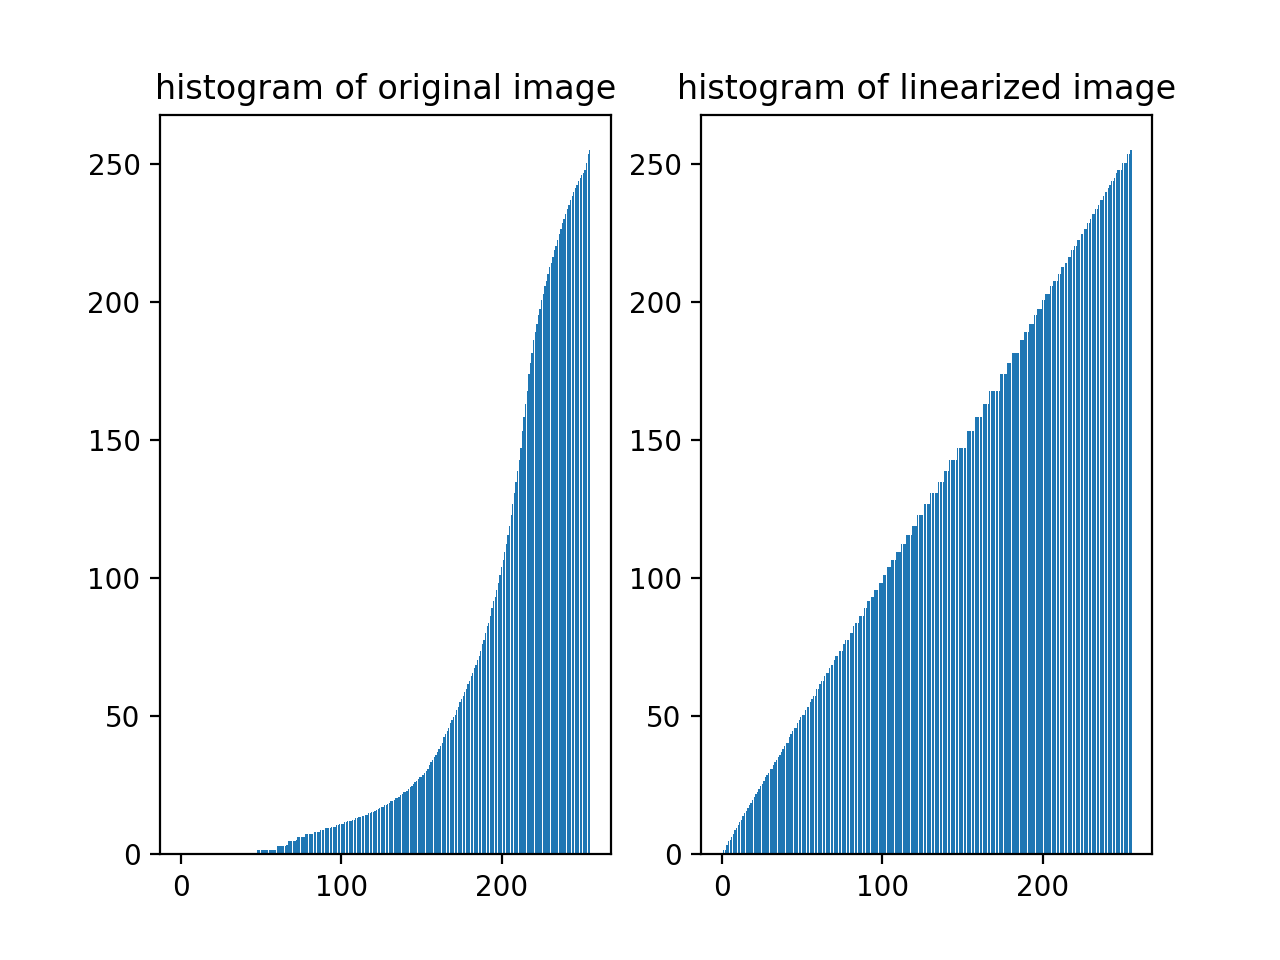

In [9]:
plt.figure('Cumulative Histogram')

plt.subplot(1,2,1)
plt.title('histogram of original image')
plt.bar(range(len(image_cumulative_histogram)), image_cumulative_histogram)


plt.subplot(1,2,2)
plt.title('histogram of linearized image')
plt.bar(range(len(linearized_image_cumulative_histogram)), linearized_image_cumulative_histogram)

plt.show()

Vergleichen Sie nun die beiden Bilder, indem Sie sie nebeneinander anzeigen.

<IPython.core.display.Javascript object>


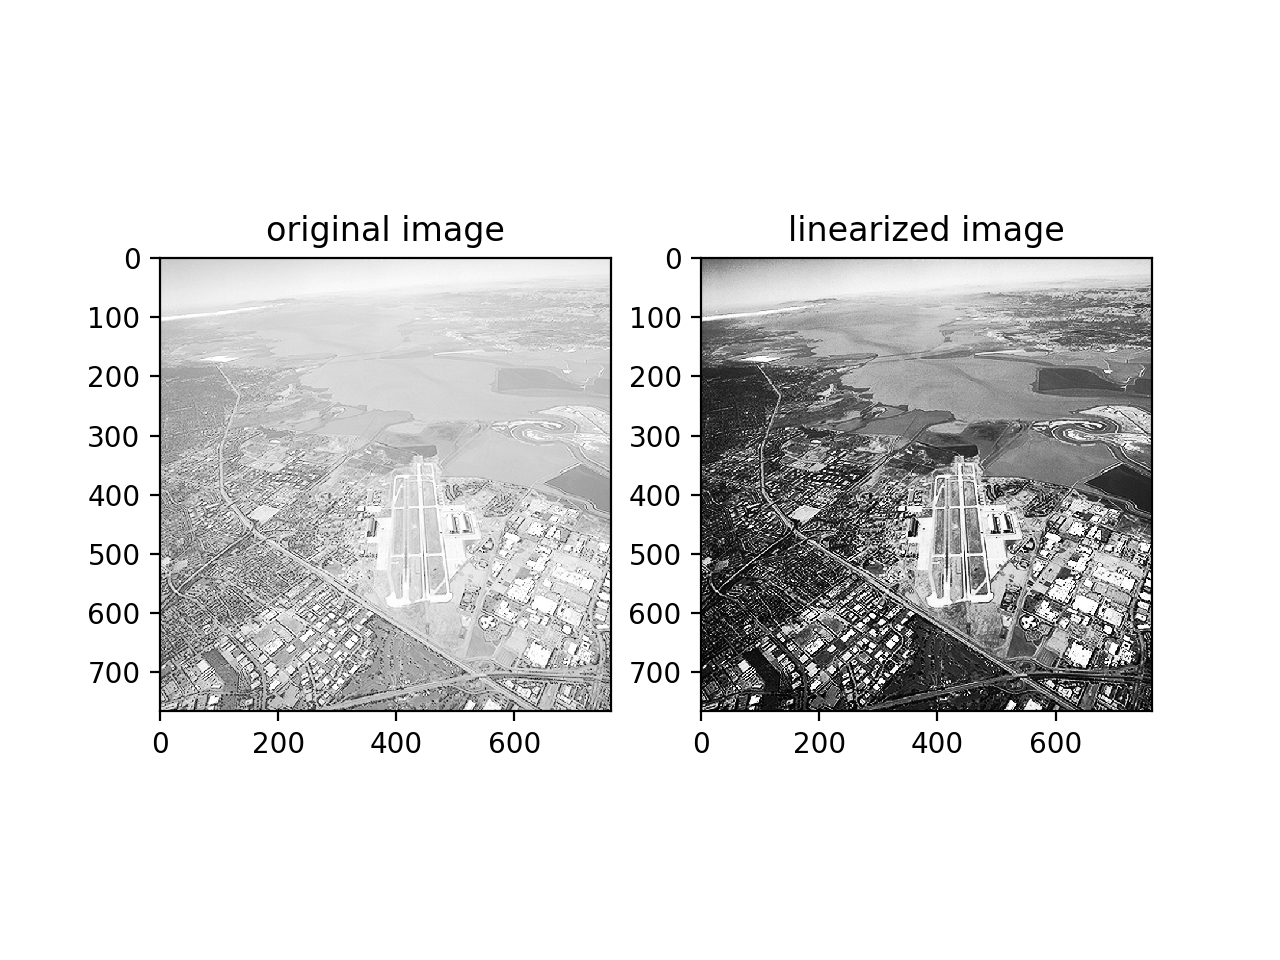

In [10]:
plt.figure('Image')

plt.subplot(1,2,1)
plt.title('original image')
plt.imshow(image, cmap='gray')

plt.subplot(1,2,2)
plt.title('linearized image')
plt.imshow(linearized_image, cmap='gray')
plt.show()

# Aufgabe 6: Evaluation
Python bzw. das Paket `skimage` stellt eigene Routinen zur Histogrammlinerarisierung und Filterung zur Verfügung.
Informieren Sie sich über den Umgang mit diesen Funktionen und vergleichen Sie diese mit den von Ihnen implementierten Verfahren hinsichtlich der Ergebnisse und Laufzeiten! Tipp: Messen Sie die Laufzeit mit dem magischen Jupyter-Befehl `%time`!

In [11]:
from skimage import exposure

start=time.time()
linearized_image_cumulative_histogram = ex2_cumulative_histogram(linearized_image)
end=time.time()
print('time cost of my function: ', end-start, 's')
print('the linearized image that be gotten from my function: ')
print(linearized_image)
print('')

start_skimage=time.time()
linearized_img =255.0* exposure.equalize_hist(image)
end_skimage=time.time()
print('time cost of skimage package: ', end-start, 's')
print('the linearized image that be gotten from skimage package: ')
print(linearized_img)

time cost of my function:  2.3910770416259766 s
the linearized image that be gotten from my function: 
[[101 101 101 ... 212 210 216]
 [101 103 103 ... 214 210 214]
 [103 103 106 ... 216 210 210]
 ...
 [200 181 119 ... 205 153  93]
 [153 174 181 ... 163 130 142]
 [ 98 142 214 ...  98 109 174]]

time cost of skimage package:  2.3910770416259766 s
the linearized image that be gotten from skimage package: 
[[101.17652773 101.17652773 101.17652773 ... 212.64254745 210.18881913
  216.55956009]
 [101.17652773 103.95533377 103.95533377 ... 214.3339946  210.18881913
  214.3339946 ]
 [103.95533377 103.95533377 106.72718627 ... 216.55956009 210.18881913
  210.18881913]
 ...
 [200.82979692 181.59371421 119.09665412 ... 205.70683185 153.43363977
   93.07652978]
 [153.43363977 174.16907825 181.59371421 ... 163.17684473 130.96416374
  142.95118721]
 [ 98.43335856 142.95118721 214.3339946  ...  98.43335856 109.51903019
  174.16907825]]


<IPython.core.display.Javascript object>


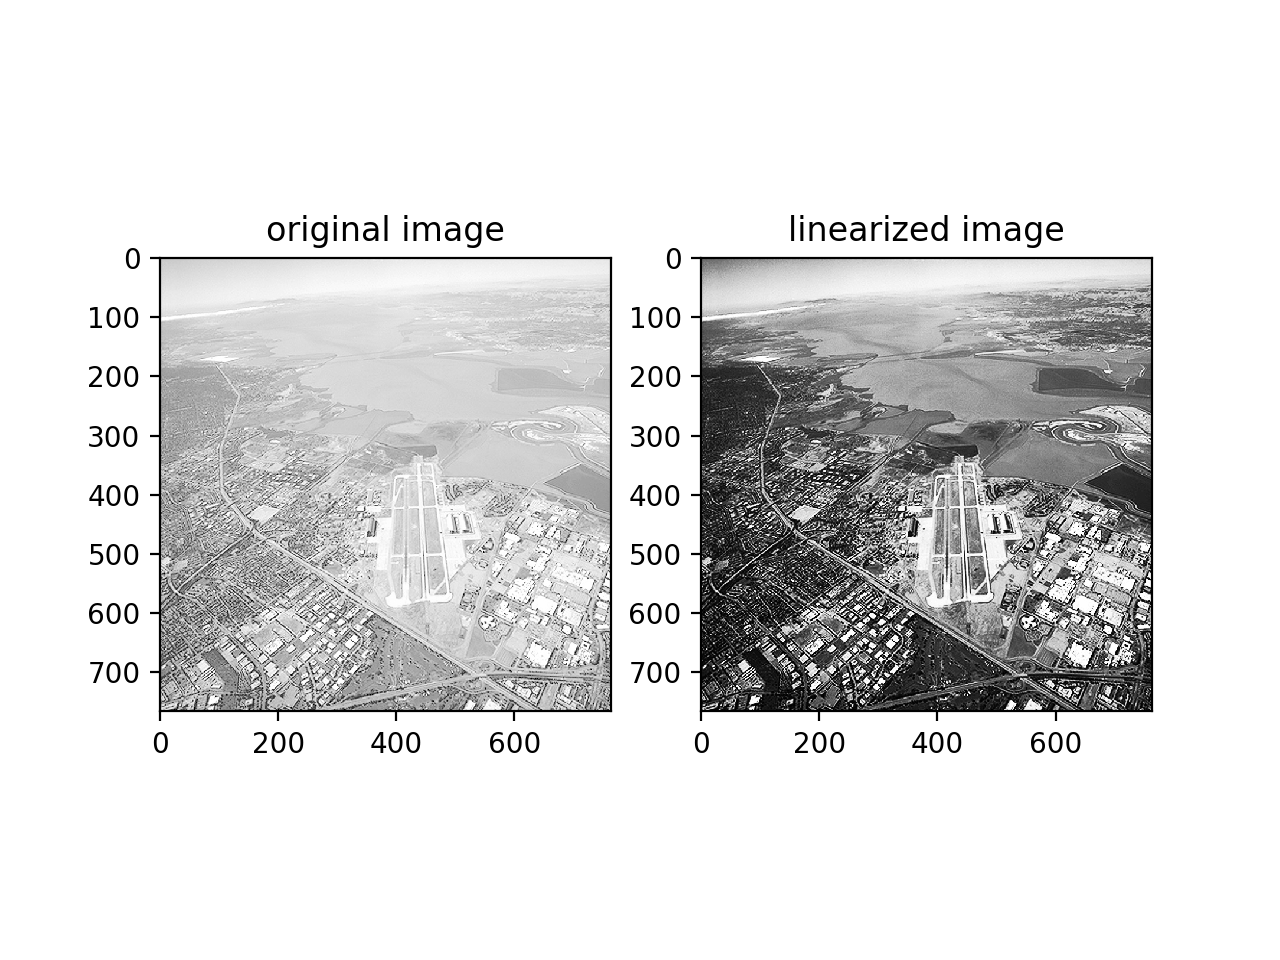

In [12]:
from skimage import exposure

plt.figure('Image after Using Skimage')

plt.subplot(1,2,1)
plt.title('original image')
plt.imshow(image, cmap='gray')

linearized_img = exposure.equalize_hist(image)
arr=linearized_img.flatten()
plt.subplot(1,2,2)
plt.title('linearized image')
plt.imshow(linearized_img, cmap='gray')

plt.show()